<a href="https://colab.research.google.com/github/SungjooHwang/ICTclass/blob/main/Ex03_4_MNIST_Handwritten_Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

**The source of this code**

https://teddylee777.github.io/scikit-learn/sklearn%EC%9C%BC%EB%A1%9C-mnist-%EC%86%90%EA%B8%80%EC%94%A8%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0

https://github.com/rickiepark/handson-ml2/blob/master/03_classification.ipynb

**Import Library**


In [ ]:
# Standard scientific Python imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

**MNIST Dataset Load**

In [ ]:
# Code for loading MNIST data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)


To see the shape of the first data

**Data Preprocessing**

In [ ]:
split_ratio = 0.9
n_train = int(mnist.data.shape[0] * split_ratio)
print(n_train) # 63000

n_test = mnist.data.shape[0] - n_train
print(n_test) #7000

X_train = mnist.data[:n_train]
y_train = mnist.target[:n_train]
print(X_train.shape, y_train.shape) # ((63000, 784), (63000,))

X_test = mnist.data[n_train:]
y_test = mnist.target[n_train:]
print(X_test.shape, y_test.shape) # ((7000, 784), (7000,))

# Checking uniqueness of the target
import numpy as np
print(np.unique(y_train)) # ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
print(X_test) #[[0. 0. 0. ... 0. 0. 0.]  [0. 0. 0. ... 0. 0. 0.] ...  [0. 0. 0. ... 0. 0. 0.]]

63000
7000
(63000, 784) (63000,)
(7000, 784) (7000,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


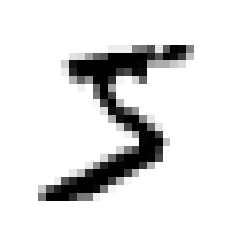

'5'

In [ ]:
some_digit = mnist.data[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()
mnist.target[0] # 5

**Training and Prediction**

Use random forest classifier

(7000,)
0.9767142857142858


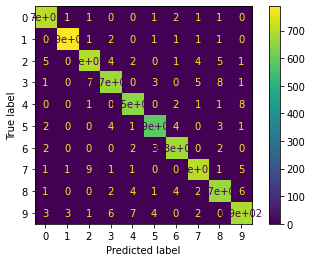

In [ ]:
# module loading
clf = RandomForestClassifier()

# train data!
clf.fit(X_train, y_train)

# make predicition
prediction = clf.predict(X_test)
print(prediction.shape) # 7000

# accuracy
result = (prediction == y_test).mean()
print(result) # 0.976

# confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test, y_test)

**Visualization**

['9' '4' '7' '5' '4' '2' '8' '5' '0' '8']


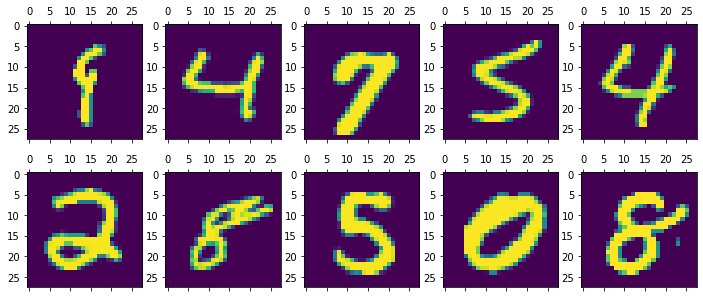

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Randomly choose several data
random_pick = np.random.randint(low=0, high=n_test, size=10)
random_pick # array([3898, 6815, 6640, 2924,  451, 2688,  633, 6563, 5993, 4024])


figure = plt.figure()
figure.set_size_inches(12, 5)


axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))

tmp_list = []
for i in range(10):
    tmp = mnist.data[n_train + random_pick[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)


for i in range(10):
    axes[i].matshow(tmp_list[i])

# print the test data label
print(y_test[random_pick])